In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split
from surprise import Dataset, Reader, SVD, KNNBasic, KNNWithMeans
from surprise.accuracy import rmse, mae


import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ratings.csv
/kaggle/input/links_small.csv
/kaggle/input/credits.csv
/kaggle/input/keywords.csv
/kaggle/input/movies_metadata.csv
/kaggle/input/ratings_small.csv
/kaggle/input/links.csv


In [2]:
ratings_data = pd.read_csv('/kaggle/input/ratings_small.csv')
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [3]:
reader = Reader(rating_scale=(min(ratings_data['rating']), max(ratings_data['rating'])))
data_surprise = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader) 

In [4]:
pmf = SVD(biased=False) # PMF
user_cf = KNNBasic(sim_options={'user_based': True}) # User based collaborative filtering
item_cf = KNNBasic(sim_options={'user_based': False}) # Item based collaborative filtering

In [5]:
pmfRes = cross_validate(pmf, data_surprise, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7846  0.7891  0.7850  0.7794  0.7756  0.7827  0.0047  
RMSE (testset)    1.0192  1.0211  1.0203  1.0093  1.0063  1.0152  0.0062  
Fit time          1.60    1.57    1.65    1.61    1.61    1.61    0.03    
Test time         0.24    0.13    0.23    0.14    0.14    0.18    0.05    


In [6]:
user_cf = cross_validate(user_cf, data_surprise, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7416  0.7467  0.7461  0.7389  0.7436  0.7434  0.0029  
RMSE (testset)    0.9653  0.9725  0.9694  0.9601  0.9701  0.9675  0.0043  
Fit time          0.18    0.19    0.20    0.19    0.18    0.19    0.01    
Test time         1.74    1.68    1.79    1.62    1.70    1.70    0.06    


In [7]:
item_cf = cross_validate(item_cf, data_surprise, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7238  0.7219  0.7182  0.7216  0.7153  0.7202  0.0030  
RMSE (testset)    0.9335  0.9361  0.9337  0.9383  0.9296  0.9342  0.0029  
Fit time          4.61    4.31    4.13    4.00    4.07    4.22    0.22    
Test time         7.69    8.15    7.74    7.94    8.13    7.93    0.19    


In [8]:
pmf_res = pmfRes
user_cf_res = user_cf
item_cf_res = item_cf

pmf_rmse_mean = pmf_res['test_rmse'].mean()
pmf_mae_mean = pmf_res['test_mae'].mean()

user_cf_rmse_mean = user_cf_res['test_rmse'].mean()
user_cf_mae_mean = user_cf_res['test_mae'].mean()

item_cf_rmse_mean = item_cf_res['test_rmse'].mean()
item_cf_mae_mean = item_cf_res['test_mae'].mean()

# Display average performances
print("Average RMSE:")
print(f"PMF: {pmf_rmse_mean}")
print(f"User-based CF: {user_cf_rmse_mean}")
print(f"Item-based CF: {item_cf_rmse_mean}")

print("\nAverage MAE:")
print(f"PMF: {pmf_mae_mean}")
print(f"User-based CF: {user_cf_mae_mean}")
print(f"Item-based CF: {item_cf_mae_mean}")

# Determine the best model based on RMSE and MAE
best_model_rmse = min(pmf_rmse_mean, user_cf_rmse_mean, item_cf_rmse_mean)
best_model_mae = min(pmf_mae_mean, user_cf_mae_mean, item_cf_mae_mean)

if best_model_rmse == pmf_rmse_mean or best_model_mae == pmf_mae_mean:
    print("\nBest Model for RMSE/MAE: PMF")
elif best_model_rmse == user_cf_rmse_mean or best_model_mae == user_cf_mae_mean:
    print("\nBest Model for RMSE/MAE: User-based CF")
else:
    print("\nBest Model for RMSE/MAE: Item-based CF")

Average RMSE:
PMF: 1.0152386188533253
User-based CF: 0.9674680718464025
Item-based CF: 0.9342466731895144

Average MAE:
PMF: 0.7827224155286475
User-based CF: 0.7433724048883279
Item-based CF: 0.7201683945966545

Best Model for RMSE/MAE: Item-based CF


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7671  0.7680  0.7598  0.7668  0.7730  0.7669  0.0042  
RMSE (testset)    0.9931  0.9935  0.9855  0.9953  0.9970  0.9929  0.0039  
Fit time          0.28    0.31    0.31    0.29    0.29    0.29    0.01    
Test time         1.61    1.77    1.59    1.68    1.64    1.66    0.06    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

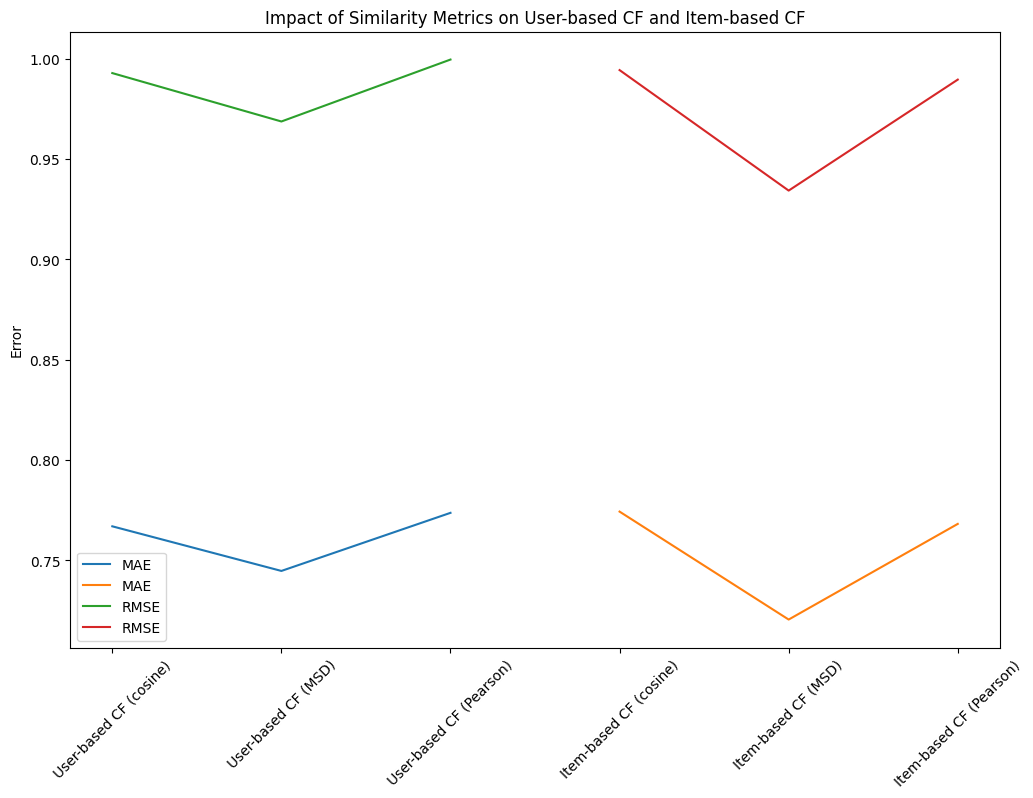

In [9]:
# Similarity metrics to evaluate
similarity_metrics = ['cosine', 'msd', 'pearson']

user_cf_mae = []
user_cf_rmse = []
item_cf_mae = []
item_cf_rmse = []

for sim_metric in similarity_metrics:
    # User-based CF
    user_cf = KNNBasic(sim_options={'name': sim_metric, 'user_based': True})
    user_cf_results = cross_validate(user_cf, data_surprise, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    user_cf_mae.append(user_cf_results['test_mae'].mean())
    user_cf_rmse.append(user_cf_results['test_rmse'].mean())

    # Item-based CF
    item_cf = KNNBasic(sim_options={'name': sim_metric, 'user_based': False})
    item_cf_results = cross_validate(item_cf, data_surprise, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    item_cf_mae.append(item_cf_results['test_mae'].mean())
    item_cf_rmse.append(item_cf_results['test_rmse'].mean())

# Plotting
plt.figure(figsize=(12, 8))
labels = ['User-based CF (cosine)', 'User-based CF (MSD)', 'User-based CF (Pearson)',
          'Item-based CF (cosine)', 'Item-based CF (MSD)', 'Item-based CF (Pearson)']

plt.plot(labels[:3], user_cf_mae, label='MAE')
plt.plot(labels[3:], item_cf_mae, label='MAE')
plt.plot(labels[:3], user_cf_rmse, label='RMSE')
plt.plot(labels[3:], item_cf_rmse, label='RMSE')

plt.legend()
plt.title('Impact of Similarity Metrics on User-based CF and Item-based CF')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7551  0.7559  0.7528  0.7557  0.7553  0.7550  0.0011  
RMSE (testset)    0.9843  0.9848  0.9860  0.9886  0.9866  0.9861  0.0015  
Fit time          0.18    0.19    0.21    0.21    0.21    0.20    0.01    
Test time         1.15    1.38    1.19    1.34    1.24    1.26    0.09    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

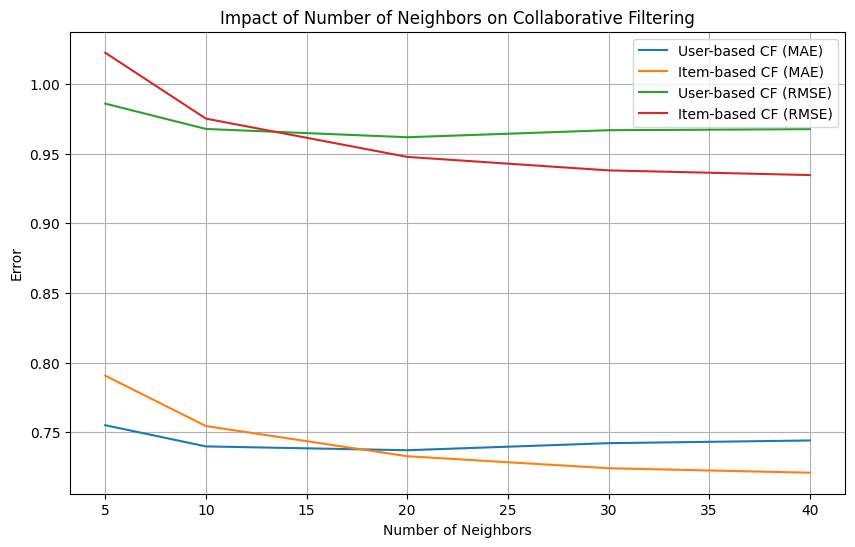

In [10]:
neighbor_values = [5, 10, 20, 30, 40]

# Store MAE and RMSE for User-based and Item-based CF for each number of neighbors
user_cf_mae = []
user_cf_rmse = []
item_cf_mae = []
item_cf_rmse = []

for n_neighbors in neighbor_values:
    # User-based CF
    user_cf = KNNBasic(k=n_neighbors, sim_options={'user_based': True})
    user_cf_results = cross_validate(user_cf, data_surprise, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    user_cf_mae.append(user_cf_results['test_mae'].mean())
    user_cf_rmse.append(user_cf_results['test_rmse'].mean())

    # Item-based CF
    item_cf = KNNBasic(k=n_neighbors, sim_options={'user_based': False})
    item_cf_results = cross_validate(item_cf, data_surprise, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    item_cf_mae.append(item_cf_results['test_mae'].mean())
    item_cf_rmse.append(item_cf_results['test_rmse'].mean())

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(neighbor_values, user_cf_mae, label='User-based CF (MAE)')
plt.plot(neighbor_values, item_cf_mae, label='Item-based CF (MAE)')
plt.plot(neighbor_values, user_cf_rmse, label='User-based CF (RMSE)')
plt.plot(neighbor_values, item_cf_rmse, label='Item-based CF (RMSE)')

plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.title('Impact of Number of Neighbors on Collaborative Filtering')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
neighbor_values = [5, 10, 20, 30, 40]

# Initialize variables to store best K and best RMSE for UCF and ICF
best_k_ucf = None
best_rmse_ucf = float('inf')

best_k_icf = None
best_rmse_icf = float('inf')

for n_neighbors in neighbor_values:
    # User-based CF
    user_cf = KNNBasic(k=n_neighbors, sim_options={'user_based': True})
    user_cf_results = cross_validate(user_cf, data_surprise, measures=['RMSE'], cv=5, verbose=True)
    mean_rmse_ucf = user_cf_results['test_rmse'].mean()
    
    # Update best K and best RMSE for UCF
    if mean_rmse_ucf < best_rmse_ucf:
        best_rmse_ucf = mean_rmse_ucf
        best_k_ucf = n_neighbors

    # Item-based CF
    item_cf = KNNBasic(k=n_neighbors, sim_options={'user_based': False})
    item_cf_results = cross_validate(item_cf, data_surprise, measures=['RMSE'], cv=5, verbose=True)
    mean_rmse_icf = item_cf_results['test_rmse'].mean()
    
    # Update best K and best RMSE for ICF
    if mean_rmse_icf < best_rmse_icf:
        best_rmse_icf = mean_rmse_icf
        best_k_icf = n_neighbors

# Display the best K and corresponding RMSE for UCF and ICF
print(f"Best K for User-based CF (UCF): {best_k_ucf}, RMSE: {best_rmse_ucf}")
print(f"Best K for Item-based CF (ICF): {best_k_icf}, RMSE: {best_rmse_icf}")

# Compare if the best K for UCF is the same as the best K for ICF
if best_k_ucf == best_k_icf:
    print("The best K for User-based CF is the same as the best K for Item-based CF.")
else:
    print("The best K for User-based CF is different from the best K for Item-based CF.")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9802  0.9909  0.9828  0.9922  0.9917  0.9876  0.0050  
Fit time          0.18    0.21    0.20    0.20    0.21    0.20    0.01    
Test time         1.29    1.23    1.31    1.20    1.28    1.26    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similari